In [1]:
import pandas as pd

In [121]:
df = pd.read_csv("/home/denniss/Downloads/train.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Exploration

Columns

In [122]:
# What are those cryptic column names?

# sibsp - number of siblings/spouses aboard
# parch - number of parents/children aboard
# ticket - ticket number
# fare - passenger fare
# cabin - cabin
# embarked - port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [123]:
# Describe, classify data

# 'Pclass' - ordinal
# 'Name'   - nominal
# 'Sex'    - nominal
# 'Age'    - continuous metric
# 'SibSp'  - discrete metric
# 'Parch'  - discrete metric
# 'Ticket' - nominal
# 'Fare'   - continuous metric
# 'Cabin'  - nominal
# 'Embarked' - nominal

Missing values

In [124]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [125]:
df["Cabin"].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [126]:
# Drop 'Cabin' column: too many missing values, too many unique ones
df = df.drop(['Cabin'], axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [127]:
df.Ticket.describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [128]:
df.drop(["Ticket"], axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


Columns with numerical values only

In [129]:
# Calculate average survival rate / Pclass
df[["Pclass", "Survived"]].groupby(["Pclass"]).mean().sort_values(by="Survived", ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [130]:
# SibSp
df[["SibSp", "Survived"]].groupby(["SibSp"]).mean().sort_values(by="Survived", ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


"Fare" is a bit difficult to inspect, due to continuous character

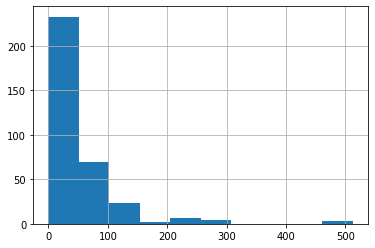

In [182]:
survived = df[df.Survived == 1]
survived["Fare"].hist()

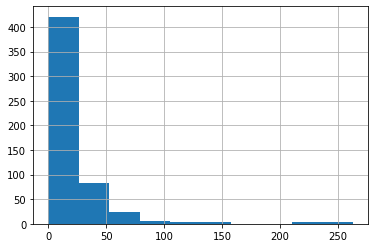

In [183]:
died = df[df.Survived == 0]
died["Fare"].hist()

In [185]:
# Segment data to better inspect it
df["FareFrames"] = pd.cut(df["Fare"], 5)
df["FareFrames"].unique()

[(-0.512, 102.466], (204.932, 307.398], (102.466, 204.932], (409.863, 512.329]]
Categories (4, interval[float64]): [(-0.512, 102.466] < (102.466, 204.932] < (204.932, 307.398] < (409.863, 512.329]]

In [186]:
# The poor are dying
df[["FareFrames", "Survived"]].groupby(["FareFrames"]).mean().sort_values(by="Survived", ascending=False)

,Survived
FareFrames,
"(409.863, 512.329]",1.000000
"(102.466, 204.932]",0.757576
"(204.932, 307.398]",0.647059
"(-0.512, 102.466]",0.361575
"(307.398, 409.863]",NaN


### Data Wrangling

In [148]:
# Fill missing values for 'Age' with mean
df = df.fillna(value={'Age': df['Age'].mean()}) # value can take a dict to specify column

In [150]:
# Verify missing values are filled
df['Age'].isna().sum()

0

### Logistic Regression

In [187]:
# Build model with numerical input
X = df[["Age", "Pclass", "SibSp", "Parch", "Fare"]] # Dataframe == table == matrix / uppercase for matrices
y = df["Survived"] # Series == columns == vector / lowercase for vectors

In [188]:
X.shape, y.shape

((891, 5), (891,))

In [189]:
from sklearn.linear_model import LogisticRegression

In [190]:
model = LogisticRegression(C=1e5) # initialize the model
model.fit(X, y) # train the model (find the best parameter values for this data)b

LogisticRegression(C=100000.0)

In [191]:
# calculate a metric (accuracy == % of correct predictions)
model.score(X, y)

0.7059483726150393

In [192]:
# inspect model parameters
model.coef_, model.intercept_

(array([[-0.03833041, -0.93495535, -0.23901722,  0.21803628,  0.00460819]]),
 array([2.66508144]))

In [193]:
# make predictions
passengers = [[25.0, 3, 1, 2, 10], [10.0, 2, 1, 2, 200], [99.0, 1, 1, 0, 400]]
model.predict(passengers)

array([0, 1, 0])

In [194]:
# probabilities (actual values of the sigmoid function)
# left col: p(dead)
# right col: p(alive)
model.predict_proba(passengers)

array([[0.7015956 , 0.2984044 ],
       [0.17791173, 0.82208827],
       [0.61309127, 0.38690873]])

### Improvements

In [195]:
# 'Sex' seems like a promising column
df[["Sex", "Survived"]].groupby(["Sex"]).mean().sort_values(by="Sex", ascending=False)

,Survived
Sex,
1,0.742038
0,0.188908


In [196]:
# Transform strs to ints
df.loc[df["Sex"] == "male", "Sex"] = 0
df.loc[df["Sex"] == "female", "Sex"] = 1

In [197]:
df["Sex"].unique()

array([0, 1], dtype=object)

In [199]:
X = df[["Age", "Pclass", "SibSp", "Parch", "Fare", "Sex"]]
y = df["Survived"]

model = LogisticRegression(C=1e5)
model.fit(X, y)
model.score(X, y)

0.7934904601571269

# More Improvement?

In [201]:
# Embarked
df[["Embarked", "Survived"]].groupby(["Embarked"]).mean().sort_values(by="Embarked", ascending=False)

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571
